## Details

- Name: Suvashin Moodliar
- Student Number: 10116408
- Module: PDAN8411
- Task: 1

## Theory

### What is Linear Regression?

#### Overview

Linear Regression is a method used in statistics. It essentially models a relationship between a dependent variable and one or more independent variables by fitting a linear equation (Lawton, 2023). It seems to be used a lot and is simpler compared to other models, however, there does seem to be assumptions made by this popular model which we will cover further down in this note-book. I am of the opinion that due to the simplicity of the model it cannot adapt well to data that posesses a high level of seasonality or severe outliers, with that being said it should definitely be a note-worthy bench mark against more complex/experimental models.

#### Definition

Simply put Linear Regression is a method of analysis used in statistics to predict the value of a variable (dependent variable) based on the value of one or more variables (independent variable) (IBM, 2024).

#### Variables

Let's talk a little about linear regressions use of variables. I mentioned above that this model tries to draw a relationship between a dependent variable, and one or more independent variables (Lawton, 2023). The end goal of this model is to be able to predict the dependent variable (eg. House Price) based on the independent variable values (eg. Location, Area, Room Numbers).

#### Linear Relationship

Before we jump into code I think it's fairly important to understand the simple and multiple linear regression formulas. I was able to find a great Geeksforgeeks article to unpack this for us:

The model has some assumptions. One of them is that it assumes that there is a relationship between the independent variable and the dependent variable.
That assumed relationship can be expressed mathematically as a straight line equation:
$ŷ=β₀+β₁x$

- $ŷ$ is the predicted value of $y$, (eg. Lemonade Sales) for a given $x$, (eg. Weather). All $ŷ$ values fall on the linear regression line. $β₀$ and $β₁$ are the regression coefficients.
- $β₀$ is the intercept. This is the $y$ intercept (where the line of the graph crosses the $y$-axis or the value of $y$ when $x$ is $0$).
- $β₁$ is the coefficient of the input feature $x$ (our independent variable), it is the slope of the line. It shows the impact $x$ has on $y$. Therefore the linear regression model assumes that if $x$ increases by $1$, $y$ increases by $β₁$ (This is only possible when $x$ and $y$ have a perfect linear relationship, which, in reality is hardly the case)
$β₀$ ($y$ intercept) and $β₁$ (slope) are both learned from the dataset by the model.
Thus, when a linear regression model is fit, the model is responsible for estimating the best values for $β₀$ and $β₁$ based on the dataset.

But what if you don't want to predict lemonade sales based only on the weather but the price and location as well, then what? Well there's a formula for multiple independent variables in order to predict one dependent variable: $ŷ=β₀+β₁x₁+β₂x₂+…+βₙxₙ$

Where $x₁, x₂, ..., xₙ$ are the independent variables and $β₁, β₂, …,βₙ$ are the slopes

(Gupta, 2024)

#### Assumptions of Linear Regression:

Linear Regression does have some assumptions, so it is important that a data set is selected with these in mind:
- Linearity - The model assumes that there is some kind of linear relationship between the independent and dependent variables (IBM, 2024).
- Independence - the residuals (differences between observed and predicted values) are independent of each other. In other words, if there is an underlying pattern regarding how residuals occur then this model cannot cater for that, it assumes residuals occur independently (IBM, 2024).
- Homoscedasticity - The variance of the residuals is constant across all levels of the independent variables. So if the model gets predictions wrong, how much that varies compared to other residuals is the same (btd, 2023).
- Normality - The residuals follow a normal distribution. Meaning that our wrong predictions in most cases should be somewhat close to the actual data and only have minimal instance where the model was completely off (btd, 2023).

#### Types of Linear Regression:

There are few different types of Linear Regression:
- Simple Linear Regression: 1 dependent variable, 1 independent variable
- Multiple Linear Regression: 1 dependent variable, multiple independent variables
- Polynomial Regression: 1 dependent variable, polynomial functions of multiple independent variables
<br>

(Lawton, 2023)

But in this notebook we're just going to focus on multiple linear regression.

### Appropriate Data Set

#### Data Set Source

- Dataset: Housing Prices
- Source: Kaggle
- Link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data
- Author: M Yasser H
- In-text reference: (H, 2022)

#### Why is this data set appropriate for linear regression?

Since linear regression is a statistical method that allows us to study the relationship between two (or more) continuous variables, I felt housing data would be a good fit because the price of a house is a continuous variable and it is expected to be influenced by other features (bedrooms, bathrooms, parking, etc.). Therefore the housing dataset is appropriate to conduct linear regression on as a form of predictive analysis.

Additionally the property market is rarely unstable and known to have low volatility compared to other datasets involving prices, this means that the data shouldn't contain too many outliers. Low volatility also means that the data should be more likely to have a linear relationship between variables which ties back to linearity (assumptions of linear regression). Regarding the other assumptions, the residuals don't exactly have an underlying relationship in comparison to something like the stock market therefore we should be good to go. 

### Analysis to be conducted

#### What analysis will be performed on the dataset?

The goal here is to use a multiple linear regression model to predict housing prices based on the given features of the house in the dataset. In order to achieve this the model will need to be trained with a portion of the data and the rest of the data will be used to test it. The models predictions will provide insight into the models performance.

Since we're conducting multiple linear regression on the dataset we will extract and use all the features of the housing price dataset.
Here are the following steps I plan to carry out when conducting analysis on the dataset:
- I plan on doing some exploratory data analysis on the dataset after loading it, this will involve cleaning the data, and displaying it visually to see what I am working with.
- Once that is done, I will proceed to conduct any data pre-processing required, this will typically take the form of converting categorical data into integers.
- After this I will split the columns into a dependent variable and independent variables once this is done I can proceed to split the dataset into a training set and a testing set
- Next, I will proceed to train the model using sklearn and then use it to generate predictions. We will match up the test set with the predictions and view them side by side.
- Lastly I will evaluate the model and determine whether or not it performed well.

In terms of high level use of libraries I will use the pandas library to load and manipulate the data, sklearn to build and test the regression model, and matplotlib to visualize the data and results.

## Python Code

### Import Python Packages

Importing the necessary libraries in Python that will be needed for conducting linear regression.
Let's unpack each one:

- <span style=color:green;>pandas</span>: This library is used for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data.
    - [pandas documentation](https://pandas.pydata.org/docs/)
- <span style=color:green;>numpy</span>: This is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
    - [numpy documentation](https://numpy.org/doc/)
- <span style=color:green;>seaborn and matplotlib</span>: Data visualization library.
    - [seaborn documentation](https://seaborn.pydata.org/)
    - [matplotlib documentation](https://matplotlib.org/stable/index.html)
- <span style=color:green;>sklearn.model_selection</span>: This is a part of the Scikit-Learn library. It contains various functions for splitting the data into training and testing sets, cross-validation, etc.
- <span style=color:green;>sklearn.linear_model</span>: This module contains the LinearRegression class which is used to perform linear regression.
- <span style=color:green;>sklearn.metrics</span>: This module includes score functions, performance metrics and pairwise metrics and distance computations. It can be used to calculate measures such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE).
    - [sklearn documentation](https://scikit-learn.org/stable/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Load The Dataset

I'm going to use the `read_csv()` function from pandas to read the CSV file, we are then going to store the result as a dataframe within the variable called `df`.
I downloaded the dataset within the repo, to ensure availability.

In [2]:
df = pd.read_csv('Housing.csv')
#(Mahadevan, 2024)

Let's display the first few rows of this dataset to see what we are working with. We do this by calling `head()` function.

In [3]:
df.head()
#(Mahadevan, 2024)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Perform Exploratory Data Analysis

#### Understand the Data better

Let's display some information about this dataset.
<br>
I'll do this using the `info()` function.
<br>
We can see that there is 545 rows of data and 13 columns in this dataframe.
<br>
6 of the fields are of type int and 7 of the fields are of type object. 

In [4]:
df.info()
#(Mahadevan, 2024)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Now let us take a look at the summary stats for this dataset. 
<br>
I'm going to do this using the `describe()` function
<br>
We're going to display the following:
- count - number of non-null values of each column.
- mean - mean or average value of each column.
- std - standard deviation, a measure of the dispersion of values, of each column
- min - minimum value of each column
- 25% - 25th percentile (lower quartile) value of each column
- 50% - 50th percentile (median) value of each column
- 75% - 75th percentile (upper quatile) value of each column
- max - maximum value in each column

We see that our most expensive property is 13.3 million. That's a lot! But 13.3 million in what exactly? Unfortunately we don't know what currency it is in. I did check the discussions tab of the Kaggle dataset, a user by the name of Josh Greenert seemed to be able to figure out that this dataset is actually US based [https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/discussion/400545] therefore prices would be USD and area would be Acres - but given that this is for learning purposes, we're going to ignore that, since the original dataset didn't come with units, and add in our own. I think understanding this in a South African context would be much simpler to interpret therefore price will be in ZAR and area will be in $m^2$.

In [5]:
df.describe()
#(Mahadevan, 2024)

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Clean the Data

Now that we took a look at the data to see what we're working with, up next we just need to ensure that the data we're working with is clean.
<br>
Cleaning data is important, because it can heavily impact our end result if not addressed early on. 
<br>
If we have poor data quality then we will naturally get poor output when processing that data.

Let's see if there is any duplicate rows in the dataset.
<br>
We do this by using the `loc` property which enables us to access rows and columns.
<br>
We then use the `duplicated()` function to return any duplicated rows, it will loop through our entire data set and return true if there is a duplicate or false if there is not for each entry in our dataset. Which is why we used the `loc` property since it helps present the data in a table format as opposed to a list that is the length of our dataset.

In [6]:
df.loc[df.duplicated()]
#(Chen, 2021)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


Great! There doesn't seem to be any duplicate rows, next let's see if there is any null values.
<br>
We do this by printing the sum of null values for each of the columns using the `isnull()` function and the `sum()` function

In [7]:
print(df.isnull().sum())
#(Mahadevan, 2024)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


#### Data Visualising - Dependent Variable

Thankfully there wasn't any null values.
<br>
Let's explore the data some more through visuals.
<br>
In order to do that I am going to create a figure with 2 subplots using Matplotlib and Seaborn:
<br>
> `plt.figure(figsize=())`: Initializes a new figure with a specified size.
<br>
> `plt.subplot()`: Creates the first subplot within the figure. The parameters `(1,2,1)` indicate one row, two columns of subplots, and this subplot is the first one.
<br>
> `sns.histplot()`: Plots a histogram of the price data using the `histplot()` function.
<br>
> `plt.subplot()`: Creates the second subplot within the figure. The parameters `(1,2,2)` indicate one row, two columns of subplots, and this subplot is the second one.
<br>
> `sns.boxplot()`: Creates a boxplot of the price data using the `boxplot()` function.

From the histogram we can observe that the price is Right-skewed.
<br>
If we look at our box and whisker plot we can confirm this by observing the median being closer to the lower quartile.

c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


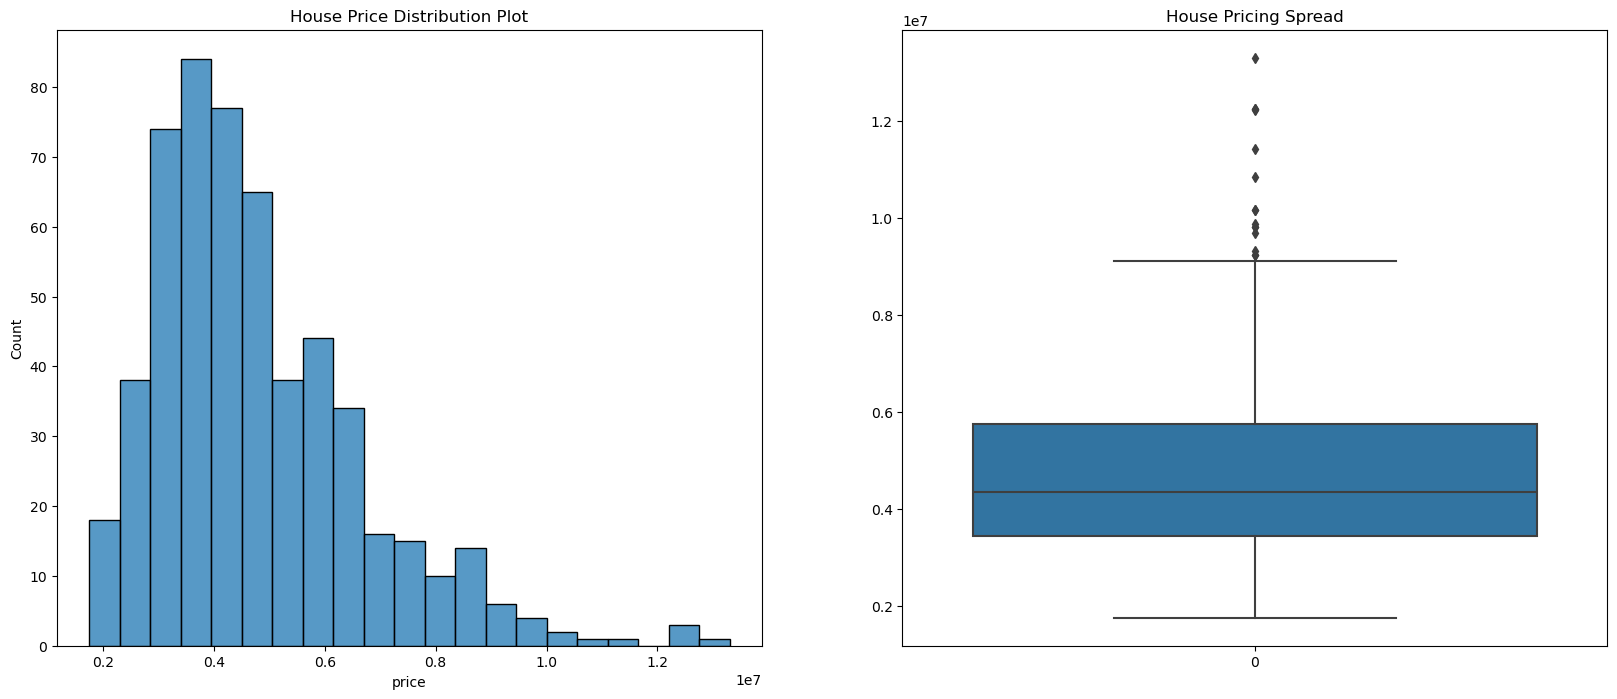

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.histplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

#(Kumar, 2024)

Lastly note that there is a difference between the mean (4.7 million) and median (50%) (4.3 million), therefore enforcing our conclusion that the data is indeed skewed

In [9]:
print(df.price.describe())

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64


#### Data Visualising - Categorical Data

Recall the dataset containing both integer and object datatypes. Well, we are going to create a list of those object columns (categorical data) and visualize it. 
<br>
An example of categorical data would be how people like their coffee (decaf, with milk, no sugar, etc.) these can be recorded as 'yes or no', 'true or false', etc. but for some reason it isn't numbers unless we transform it into something meaningful. But before we go ahead and transform the categorical data into something we can process. Let's plot it out and see if we can spot anything that can help us understand the dataset a bit better.

First let's go ahead and store all our object types in a list and then loop through the list so that we can see all the fields that are categorical

In [10]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


Now that we know which features are categorical we can go ahead and plot a graph to show us how many yes's and no's we have per feature.
<br>
Some observations to note:
- There is a lot of houses with a mainroad.
- Not many houses in this dataset have guestrooms.
- About 2 thirds of the houses in this dataset do not have a basement.

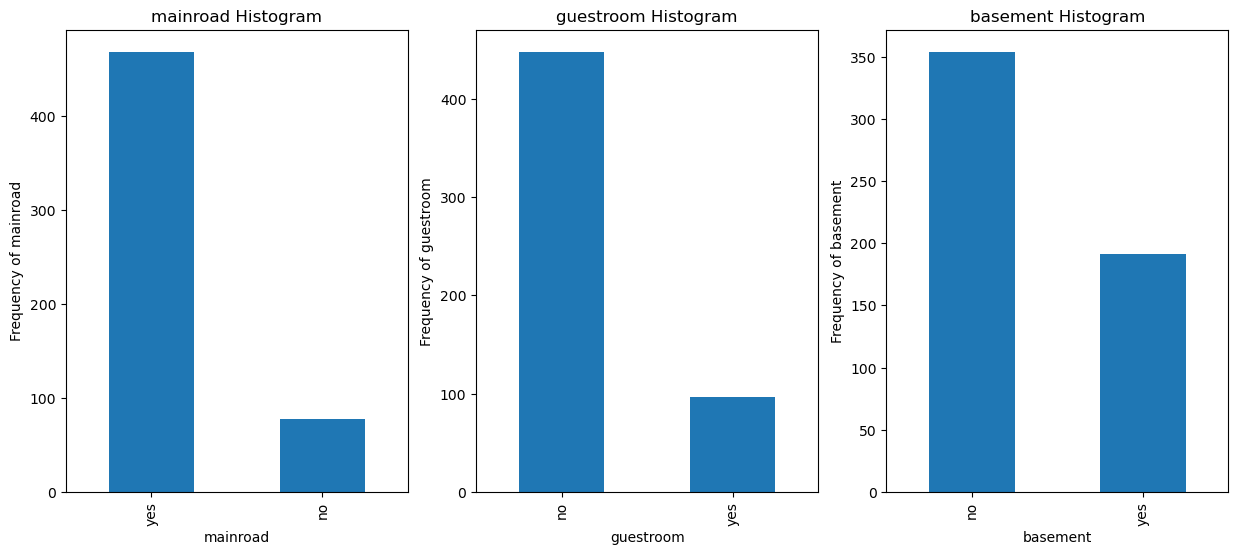

In [11]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

#(Kumar, 2024)

Some observations to note:
- Most of the houses don't have hotwater heating.
- Around 2 thirds of the houses don't have airconditioning.
- Most of the houses don't seem to be located in a preferred area.
- Seems to be a decent spread of furnished, semi-furnished, and unfurnished houses
    - With most houses being semi-furnished.

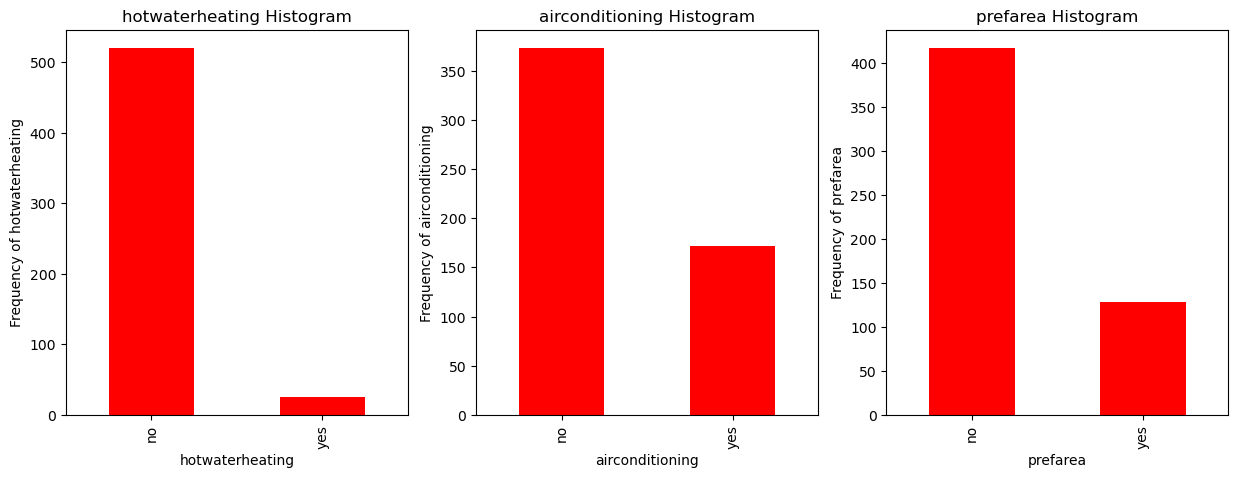

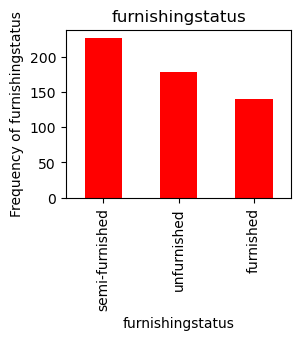

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

#(Kumar, 2024)

Let's take a look at some of the features in comparison with the price
<br>
I will use a box plot for this and depending on which box is higher we can conclude there is a correlation to the price.
<br>
<br>
Observations:
- Below is the Mainroad vs Price graph
    - We observe that the house being by the main road positively corelates with the price
- Next look at the Guestroom vs Price 
    - Having a guestroom in the house has a positive corelation with the price as well.

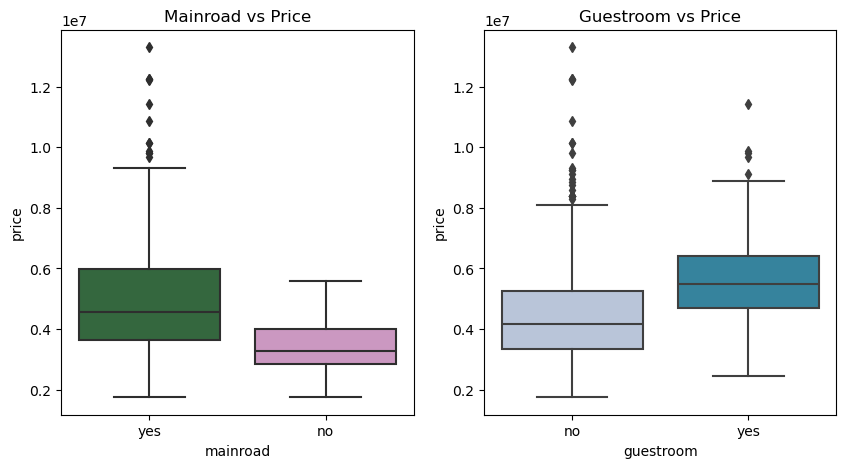

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.show()

#(Gavande, 2022)

Next let's take a look at the basement and hotwater heating features:
- First let's look at the basement vs price
    - Notice that there is a very slight correlation with having a basement and the price (in comparision to not having a basement, the green box is slightly lower than the pink one).
- Next let's take a look at hotwater heating vs price
    - Notice that there is also a very slight correlation with having hot water heating in the house.

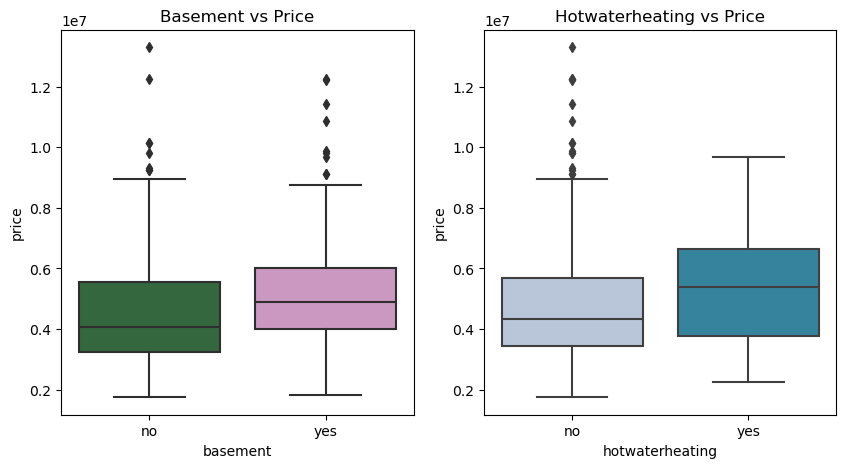

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Basement vs Price')
sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Hotwaterheating vs Price')
sns.boxplot(x=df.hotwaterheating, y=df.price, palette=("PuBuGn"))

plt.show()

#(Gavande, 2022)

Observations:
- We can observe that there is a postive correlation with having airconditioning and the price.
- The next one shows that there is a correlation between having the house in a preferred area and the price.
- And again we observe in the last graph that having a furnished house has a positive correlation to the price.

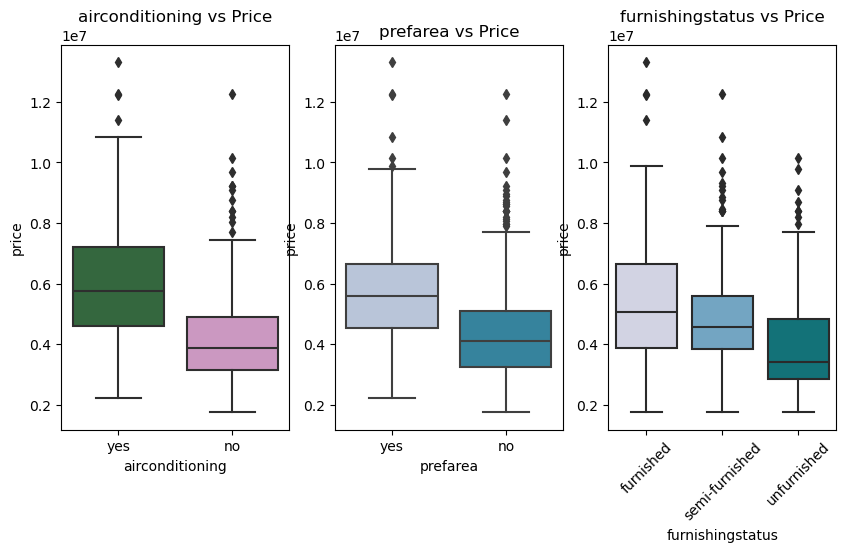

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(x=df.airconditioning, y=df.price, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('prefarea vs Price')
sns.boxplot(x=df.prefarea, y=df.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=df.furnishingstatus, y=df.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()

#(Gavande, 2022)

#### Data Visualising - Numerical data

Now that we have finished looking at the categorical data, let's go ahead and convert our numerical data to visuals so we can better understand the dataset

First let's go ahead and store our numerical fields in a list and output it so we can see which ones are numerical

In [16]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


Now we're going to plot our numerical fields on a scatter plot and see what we can observe.
- If we look at area vs price
    - We can observe that there is a postive correlation, however the relationship isn't exactly straight-forward. Notice how as the area increases the more spread out the price gets
- Regarding bedrooms, bathrooms, stories, and parking I can't see any meaningful relationship between them and the price

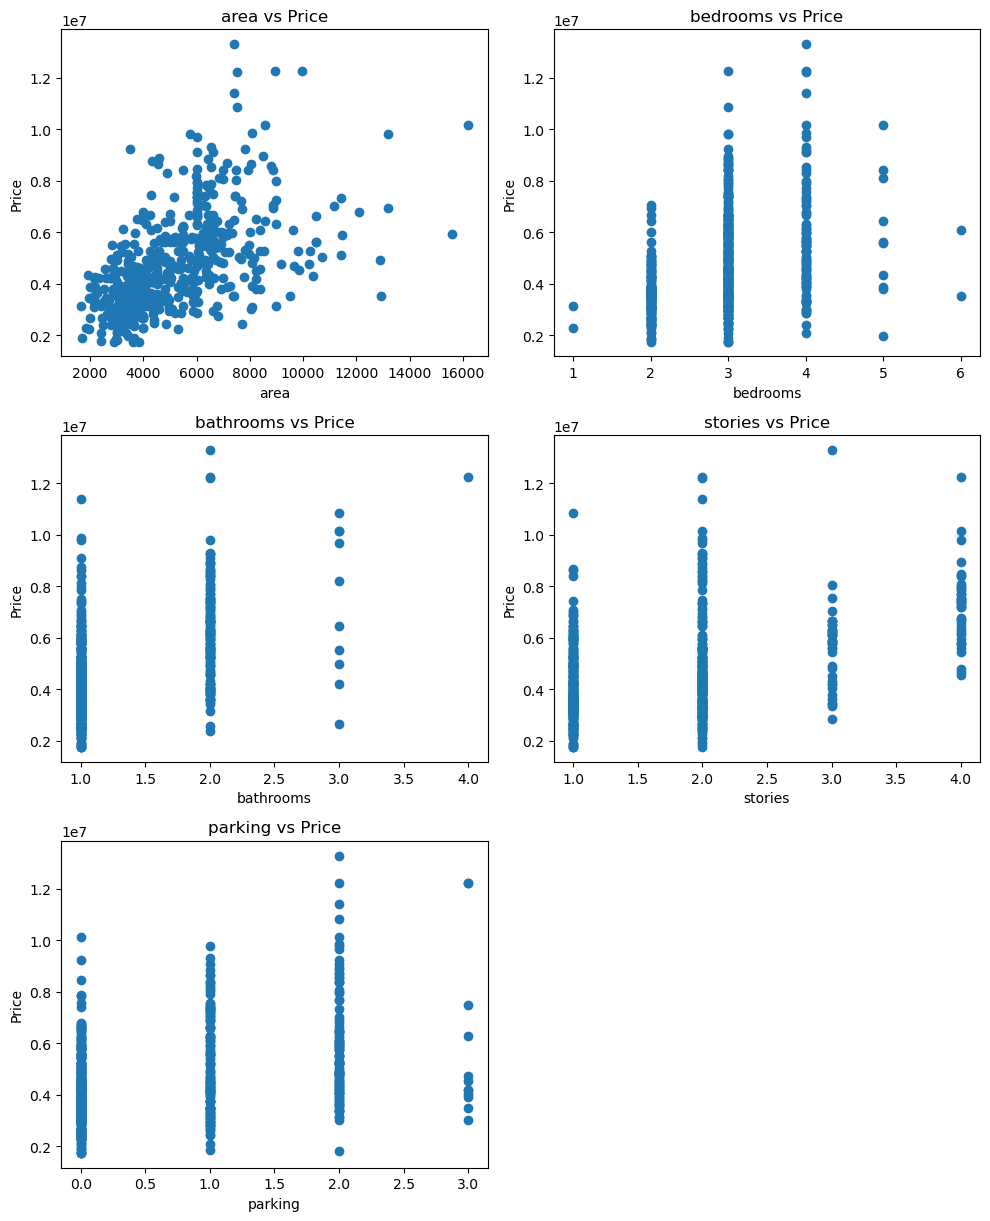

In [17]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

#(Kalamkar, 2023)

Adding a pairplot to give us a birds eye view of what we just observed

c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Suvashin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

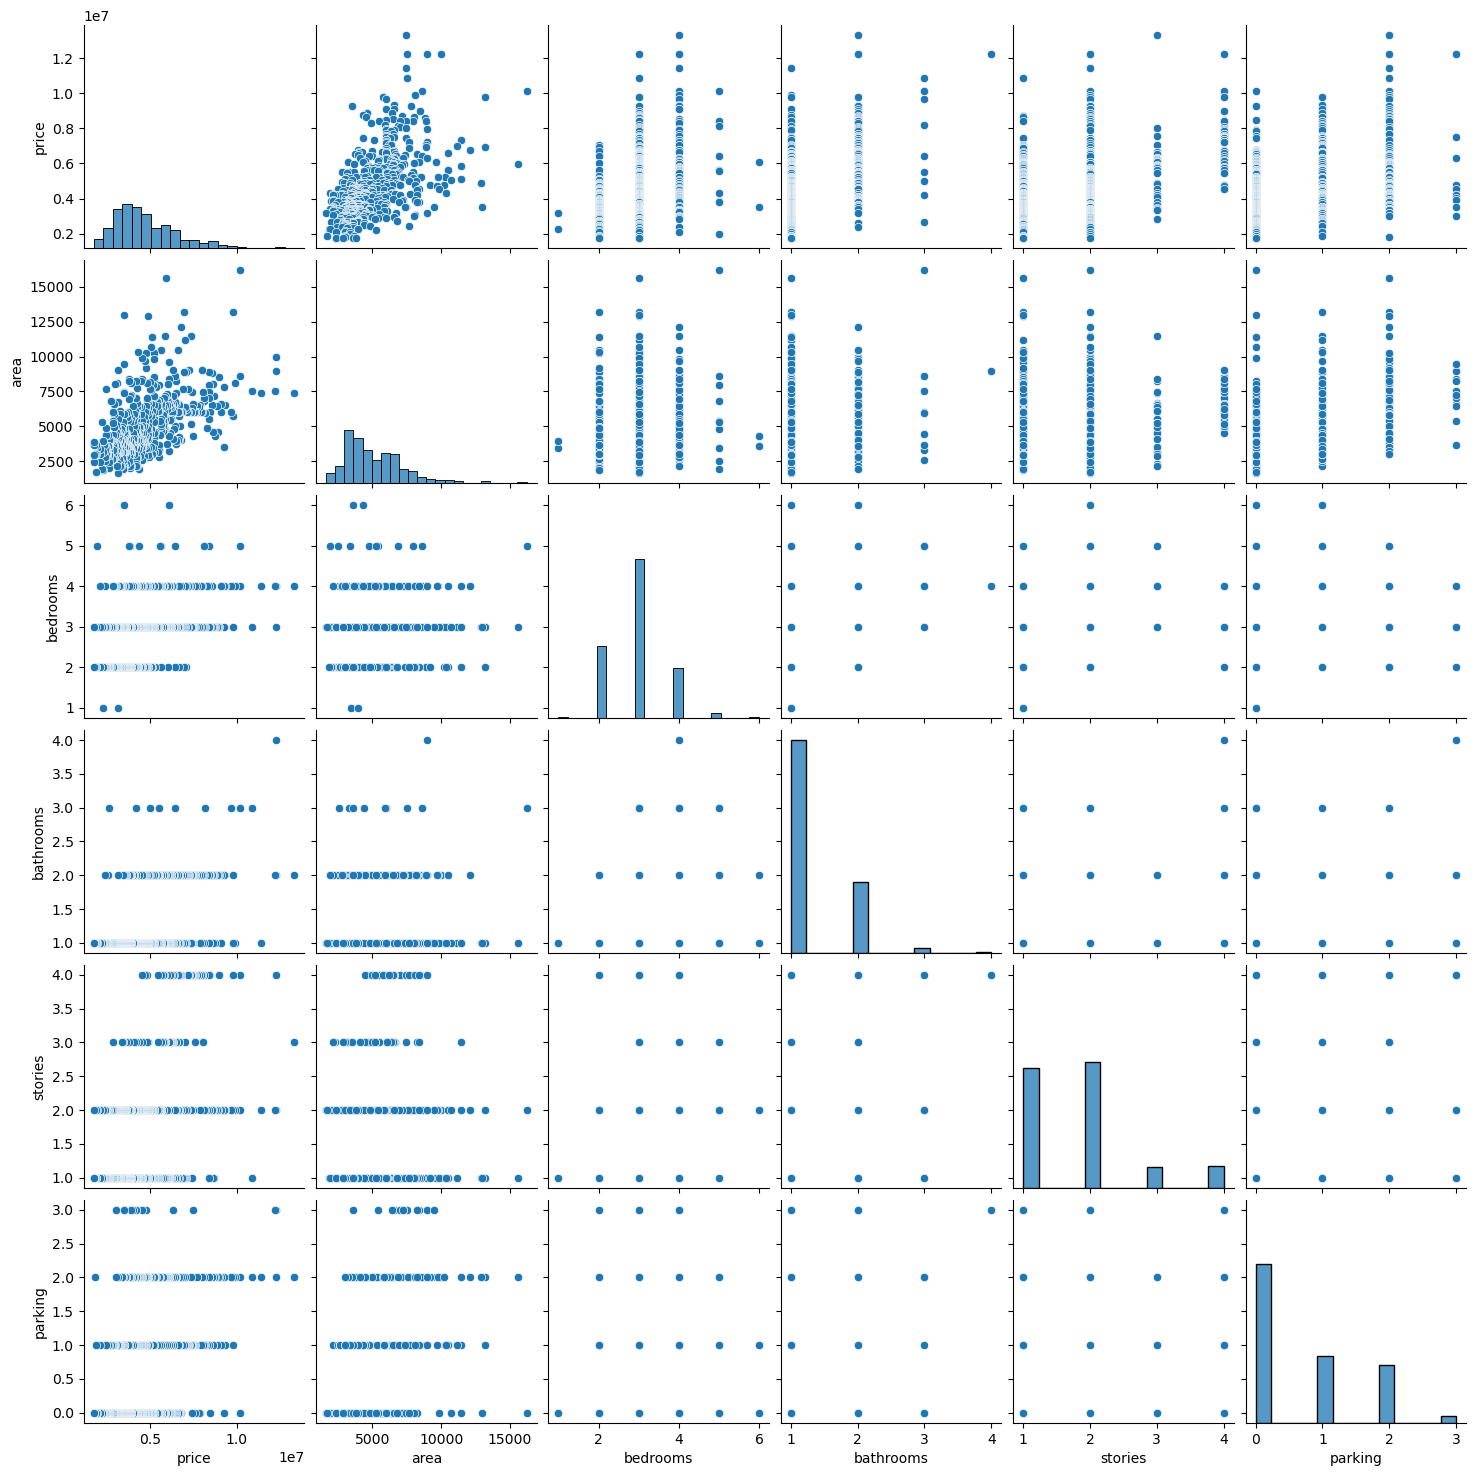

In [18]:
sns.pairplot(df)
plt.show()

Next let us take a look at a heat map for fun, I don't believe there will be new findings at this point but it would be interesting to look at correlations between other factors

- So if we look at the price row only, you would notice that area has the highest value (but it is not exactly a very strong positive correlation).
- You would also notice some really cold areas, such as parking vs stories, this tells me that there is a strong negative correlation between them, however, this doesn't mean much as we are not concerned with the relationships of independent variables.

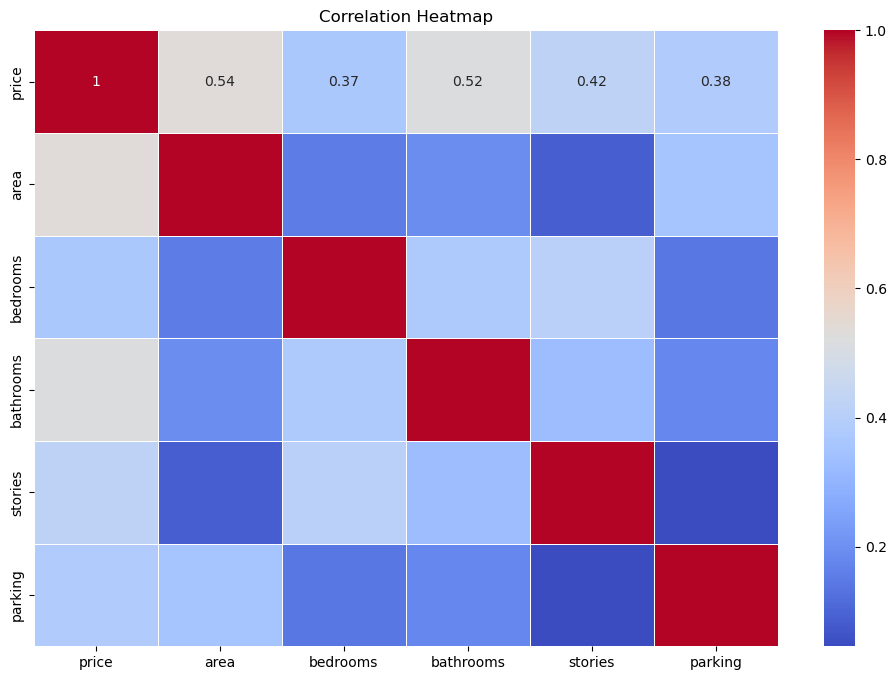

In [19]:
cor_matrix= df[numerical_list].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#(Bothma, 2024)

### Data Preprocessing

#### Convert categorical data to numerical

Since we can't process categorical data we have to convert it to numbers

First let's sort out all of our yes and no data, we will make this 1 or 0
<br>
We do this by looping through the categorical columns, then map each yes to a 1 and each no to a 0.
<br>
Finally I call the `head()` function to see if the values changed

In [20]:
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


That leaves furnishingstatus, which is a bit tricky since the data it stores is not yes or no. 
<br>
First let's use `get_dummies()` to convert each category into a column of its own with true or false values.

In [21]:
df = pd.get_dummies(df, columns=['furnishingstatus'])
df.head()

#(dkr2109, 2024)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


Nice, now we need a way to convert the True or False to 1 or 0. Let's use the same method we used for yes or no

In [22]:
for col in ['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']:
    df[col] = df[col].map({True: 1, False: 0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


Due to the changes we can confirm that we now have 15 columns

In [23]:
df.shape

(545, 15)

### Training and Predicting

#### Split Dataset - Dependent and Independent

Now we need to prep the data for the model.
<br>
First we need to separate the independent variables $X$ and the dependent variable $y$

In [24]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df['price']

#(Gupta, 2024)

#### Split Dataset - Train and Test

Now we split the data into our train set and our test set.
<br>
We do this using the `train_test_split()` function from `sklearn.model_selection`
<br>
Let's talk about the params for this function:
- `X`, `y`: Both independent and dependent variable(s) respectively, declared above.
- `test_size`: The percentage of the dataset that will be used for testing. I found 35% performs better than other splits.
- `random_state`: By setting it to 0, the same random split will be obtained every time the code is run, assuming everything else remains constant (Gupta, 2024).

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

#(Gupta, 2024)

#### Train the regression Model

Now we train the Regression model.
<br>
We do this by creating a `LinearRegression` object called `regressor`.
<br>
We then call the `fit()` method within that object and pass in our $X$ and $y$ training data.
- The `fit()` method fits the linear regression model to the training data.
- It does this by calculating the coefficients (weights) of the linear regression model that minimize the sum of squared residuals between the predicted values and the actual target values in the training data.
- After fitting, the model is trained and ready to make predictions on new data.
<br>

(Saturn Cloud, 2023)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#(Gupta, 2024)

LinearRegression()

#### Predict the result

Finally we get to the fun part!
<br>
Time to make some predictions.
<br>
The way we go about this is by calling the `predict()` method from our `regressor` object.
<br>
We pass in our test data and store our predictions in `y_pred`

In [27]:
y_pred = regressor.predict(X_test)

### Evaluation

Now it is time to judge this model's performance.
<br>
Unfortunately it is difficult to represent the performance of the model graphically since we have multiple independent variables.
<br>
However, what we can do is display a list of the predicted values and actual values side by side.
<br>
We do this by converting our predicted values and actual values to a numpy array as we can use the `concatenate()` function to help us display the data.

In [28]:
y_pred_array = np.array(y_pred)
y_test_array = np.array(y_test)

np.set_printoptions(precision=2)
result = np.concatenate((y_pred_array.reshape(len(y_pred_array), 1), y_test_array.reshape(len(y_test_array), 1)), 1)
print(result)

#(Debroy, 2023)

[[ 3879364.12  4585000.  ]
 [ 6183778.99  6083000.  ]
 [ 4437335.11  4007500.  ]
 [ 7447756.53  6930000.  ]
 [ 2826219.29  2940000.  ]
 [ 6849359.47  6195000.  ]
 [ 3218237.98  3535000.  ]
 [ 3230274.75  2940000.  ]
 [ 3557602.59  3500000.  ]
 [ 8153484.83  7980000.  ]
 [ 6572417.97  6755000.  ]
 [ 3658129.46  3990000.  ]
 [ 3837060.19  3150000.  ]
 [ 4449595.85  3290000.  ]
 [ 4043742.55  4130000.  ]
 [ 1989955.62  2660000.  ]
 [ 4119375.92  4410000.  ]
 [ 3672443.63  3710000.  ]
 [ 3302830.89  3360000.  ]
 [ 4585567.8   4270000.  ]
 [ 5848508.51  5005000.  ]
 [ 6465541.54  5383000.  ]
 [ 4742522.08  6440000.  ]
 [ 2687254.41  1890000.  ]
 [ 5426936.06  6125000.  ]
 [ 5541303.92  5460000.  ]
 [ 5446312.73  5803000.  ]
 [ 5441531.85  4620000.  ]
 [ 5677841.99  5530000.  ]
 [ 5840201.21  5950000.  ]
 [ 3385665.34  4305000.  ]
 [ 6583989.26  3640000.  ]
 [ 7121614.97  5250000.  ]
 [ 2969286.57  3325000.  ]
 [ 4681852.66  3703000.  ]
 [ 5217981.1   4753000.  ]
 [ 4993383.7   9100000.  ]
 

Looking at the values side by side it does not look like this model came anywhere close the actual values.
<br>
The next approach would be to create a plot where we have a line representing actual values and a scatter plot on top of that representing all the predictions.
<br>
Basically if it's on or close to the line then great, if it is away from the line then not great.

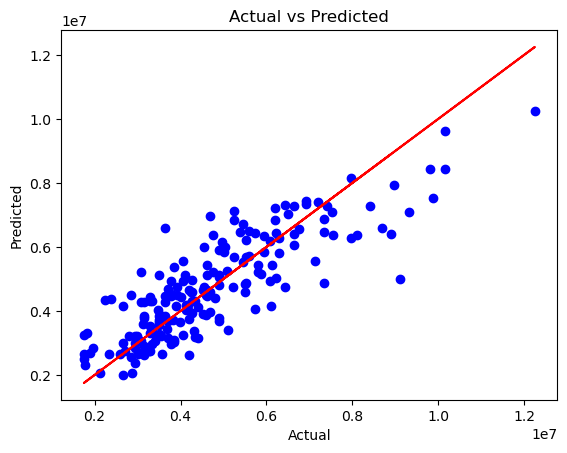

In [29]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted')

plt.show()

Based on the above graph and keeping in mind the side by side values, it looks like this model is missing the mark. If we look at the dots they seem to be somewhat 'attracted' to the line but they're not quite there yet. 
<br>
There does seem to be a general upward trend,  with most of the dots at the lower half of the line (suggesting a larger dataset is required to have a much more even spread). 
<br>
<br>
Next, let's look at the residuals. Residuals is the difference between the test data and predictions. If the Residuals Plot reflects some kind of pattern then that means the errors of this model are not homoscedastic (assumptions of linear regression).

Text(0, 0.5, 'Residuals')

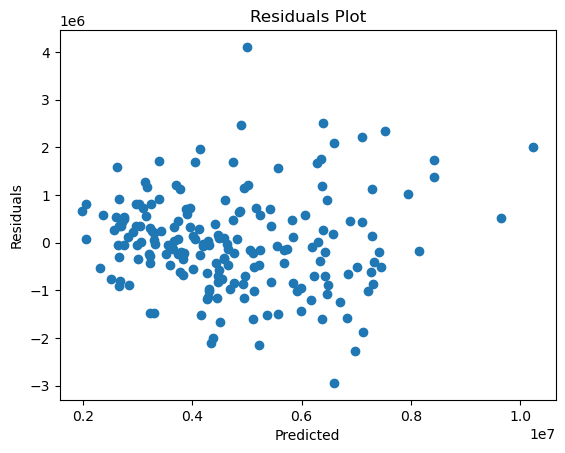

In [30]:
plt.scatter(y_pred, y_test - y_pred)
plt.title('Residuals Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')


There does not seem to be any kind of pattern occuring in the residuals therefore the errors that this model produce are homoscedastic, meaning that the error term does not vary much , which is good.
<br>
Next let's take a look at the MAE, MSE, RMSE and R2 score

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 score is: ', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 754822.9844408408
Mean Squared Error: 1003156840265.7659
Root Mean Squared Error: 1001577.1763902
r2 score is:  0.7108715631424289


- Mean Absolute Error (MAE) 
    - The MAE measures the average absolute difference between the predicted values and the actual values. 
    - The MAE of 754,823 means that, on average, the model's predictions are off by around R754,823.

- Mean Squared Error (MSE) 
    - The MSE measures the average of the squares of the errors or deviations. 
    - It gives more weight to large errors. 
    - The MSE of 1,003,156,840,265.8 indicates the model's predictions have a large spread of errors.

- Root Mean Squared Error (RMSE)
    - The RMSE is the square root of the MSE. 
    - The RMSE of 1,001,577 is a larger value compared to the MAE, reflecting the influence of large errors in the model's predictions.

- R-squared (R2) Score
    - The R-squared value measures the proportion of the variance in the dependent variable that is predictable from the independent variables. 
    - R2 score of 0.71 is 71.1% of the variance in the dependent variable can be explained by the independent variables in the model.

(Satyan, 2023)
<br>
<br>
While the R2 score indicates that the model explains a substantial portion of the variance in the target variable, the MAE, MSE, and RMSE suggest that there are still considerable errors in the model's predictions.

#### Verdict

After using several approaches to evaluate this model, I conclude that further analysis and model refinement is necessary to improve its performance. It is extremely inaccurate and in the context of the property market - a model that makes predictions which are R754,823 off from the actual price is not refined enough to be used in order to make any meaningful predictions and decisions.
<br>
Next steps to further refine this model: 
- Assess the significance of each feature and drop columns accordingly.
- Acquire a larger dataset.

## References

- IBM, 2024. What is linear regression?. [Online] 
Available at: https://www.ibm.com/topics/linear-regression
[Accessed 25 March 2024].
- btd, 2023. Foundations of Linear Regression: The 4 Key Assumptions. [Online] 
Available at: https://baotramduong.medium.com/machine-learning-4-assumptions-underlying-a-linear-regression-model-cbceacec59e2
[Accessed 25 March 2024].
- Lawton, G., 2023. What is linear regression?. [Online] 
Available at: https://www.techtarget.com/searchenterpriseai/definition/linear-regression
[Accessed 3 April 2024].
- LGupta, M., 2024. Linear Regression in Machine learning. [Online] 
Available at: https://www.geeksforgeeks.org/ml-linear-regression/
[Accessed 4 April 2024].
- H, M. Y., 2022. Housing Prices Dataset. [Online] 
Available at: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data
[Accessed 4 April 2024].
- Mahadevan, M., 2024. Step-by-Step Exploratory Data Analysis (EDA) using Python. [Online] 
Available at: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
[Accessed 04 April 2024].
- Chen, B., 2021. Finding and removing duplicate rows in Pandas DataFrame. [Online] 
Available at: https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
[Accessed 4 April 2024].
- Kumar, N., 2024. Graph Plotting in Python | Set 1. [Online] 
Available at: https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
[Accessed 5 April 2024].
- Gavande, J., 2022. Box Plot in Python using Matplotlib. [Online] 
Available at: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
[Accessed 5 April 2024].
- Kalamkar, S., 2023. matplotlib.pyplot.scatter() in Python. [Online] 
Available at: https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
[Accessed 5 April 2024].
- dkr2109, 2024. .get_dummies(). [Online] 
Available at: https://www.codecademy.com/resources/docs/pandas/built-in-functions/get-dummies
[Accessed 5 April 2023].
- Saturn Cloud, 2023. What Is the Fit Method in Python's Scikit-Learn?. [Online] 
Available at: https://saturncloud.io/blog/what-is-the-fit-method-in-pythons-scikitlearn/#:~:text=The%20fit%20method%20is%20a,the%20model%20to%20the%20data.
[Accessed 6 July 2024].
- Debroy, S., 2023. Multiple Linear Regression in Python. [Online] 
Available at: https://medium.com/@shuv.sdr/multiple-linear-regression-in-python-4ee79d763e8f
[Accessed 5 April 2024].
- Satyan, S., 2023. What is Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and R Squared?. [Online] 
Available at: https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MSE%20and%20MAE%20report%20the,variable%20described%20by%20the%20


